In [4]:
import itertools

def list_of_predecessors(G):
    all_dist=G.distance_all_pairs()
    predec_list= {}
    for v in G.vertices():
        for u in G.vertices():
            predec_list[u,v]=[i for i in G.neighbors(v) if all_dist[u][i]==all_dist[u][v]-1] 
    return predec_list

def s_p_d(p_l,a,b):
    r=[]
    if p_l[a,b]==[a]:
        r.append([a,b])
    else:
        for i in p_l[a,b]:
            for j in s_p_d(p_l,a,i):
                j.append(b)
                r.append(j)
    return r

def shortest_path_d(G):
    a_p= { "init":0}
    p_l = list_of_predecessors(G)
    for u in G.vertices():
        for v in G.vertices():
            a_p[(u,v)]=s_p_d(p_l,u,v)
    del a_p["init"]
    return a_p

def Interval(G,(a,b)):         
    l=list(itertools.chain(*shortest_path_d(G)[(a,b)]))
    return set(l)

def is_median(G):
    D=Graph(G)
    Answer=True
    all_triples=list(itertools.combinations(D.vertices(), 3))
    for triple in all_triples:
        pair=list(itertools.combinations(triple, 2))
        result = Interval(D,pair[0]).intersection(Interval(D,pair[2]), Interval(D,pair[1]))
        if len(list(result))==0:
            Answer=False
            break
    if Answer==False:
        print("The graph is not median")   
    else:   
        print("The graph is median")

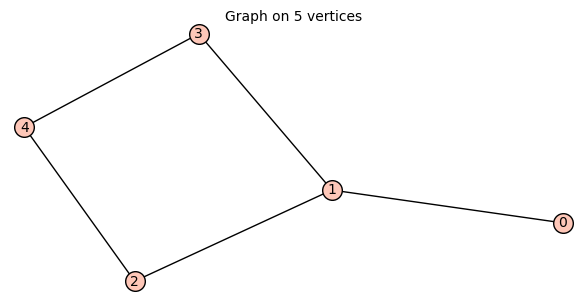

In [6]:
#Example
d={0:[1],1:[2,3],2:[4],3:[4]}
G=Graph(d)
G

The following cell creates the underlying mediangraph of the median decomposition.

In [1]:
def comp(x):
    return (x[1],x[0])
def edge_checker(x,y):
    s=False
    for sep in x:
        a=list(x)
        a.remove(sep)
        a.append(comp(sep))
        if set(a)==set(y):
            s=True
    return s        

def median_maker(s):
    G={}
    for vert1 in s:
        l=[]
        for vert2 in s:
            if edge_checker(vert1,vert2)==True:
                l.append(vert2)
        d={vert1:l}        
        G.update(d)
    return DiGraph(G).to_simple()

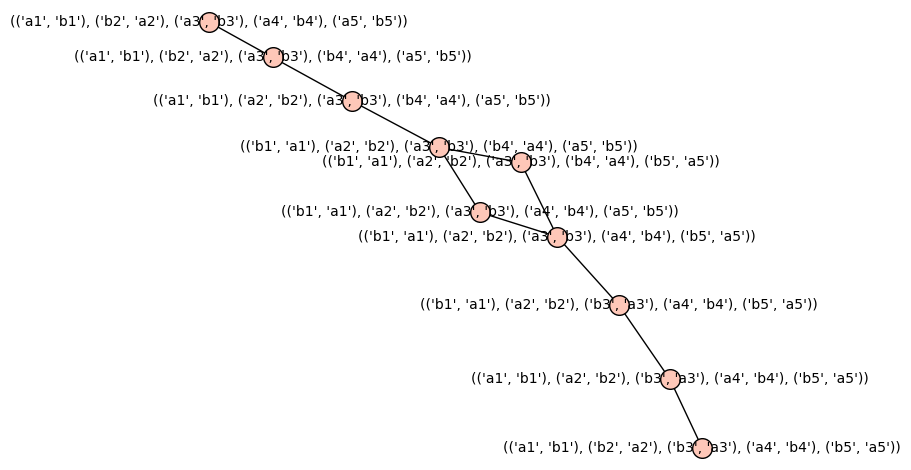

In [2]:
#Example:
a=(("a1","b1"),("b2","a2"),("a3","b3"),("b4","a4"),("a5","b5"))
b=(("a1","b1"),("a2","b2"),("a3","b3"),("b4","a4"),("a5","b5"))
c=(("a1","b1"),("b2","a2"),("a3","b3"),("a4","b4"),("a5","b5"))
d=(("b1","a1"),("a2","b2"),("a3","b3"),("b4","a4"),("a5","b5"))
e=(("b1","a1"),("a2","b2"),("a3","b3"),("a4","b4"),("a5","b5"))
f=(("b1","a1"),("a2","b2"),("a3","b3"),("b4","a4"),("b5","a5"))
h=(("a1","b1"),("b2","a2"),("b3","a3"),("a4","b4"),("b5","a5"))
i=(("b1","a1"),("a2","b2"),("b3","a3"),("a4","b4"),("b5","a5"))
j=(("a1","b1"),("a2","b2"),("b3","a3"),("a4","b4"),("b5","a5"))
k=(("b1","a1"),("a2","b2"),("a3","b3"),("a4","b4"),("b5","a5"))
l=(("b1","a1"),("a2","b2"),("a3","b3"),("a4","b4"),("a5","b5"))

s=[a,b,c,d,e,f,h,i,j,k,l]
G=median_maker(s)
G.plot()